In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker

def setup_axis(ax):
    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(60.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10.0))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/60:.0f}"))


In [22]:

DIRECTORY = "results"

file = ""

files = [
    "test_20.csv",
    "test_25.csv",
    "test_30.csv",
    "test_35.csv",
    "test_40.csv",
]
file = files[-1]
file_example = "example_measurement.csv"

path = f"{file_example}" if file == "" else f"../{DIRECTORY}/{file}"

df = pd.read_csv(f"{path}", header=[0])
timestamps = df["elapsed_time"].unique()
powers = df[df["elapsed_time"] == timestamps[0]].groupby("card_serial", dropna=True)[
    "load_power"
]
print(powers.sum())

card_serial
DT00    37.647059
DT01    37.647059
DT02    37.647059
DT03    37.647059
DT04    37.647059
DT05    37.647059
DT06    37.647059
DT07    37.647059
DT08    37.647059
Name: load_power, dtype: float64


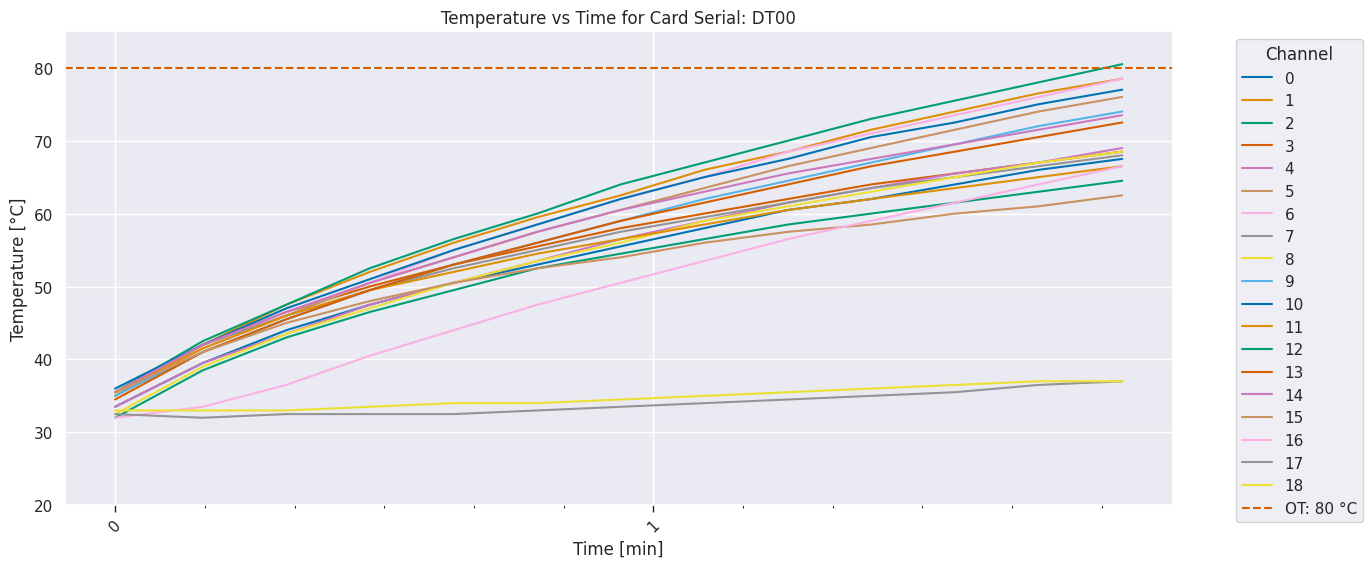

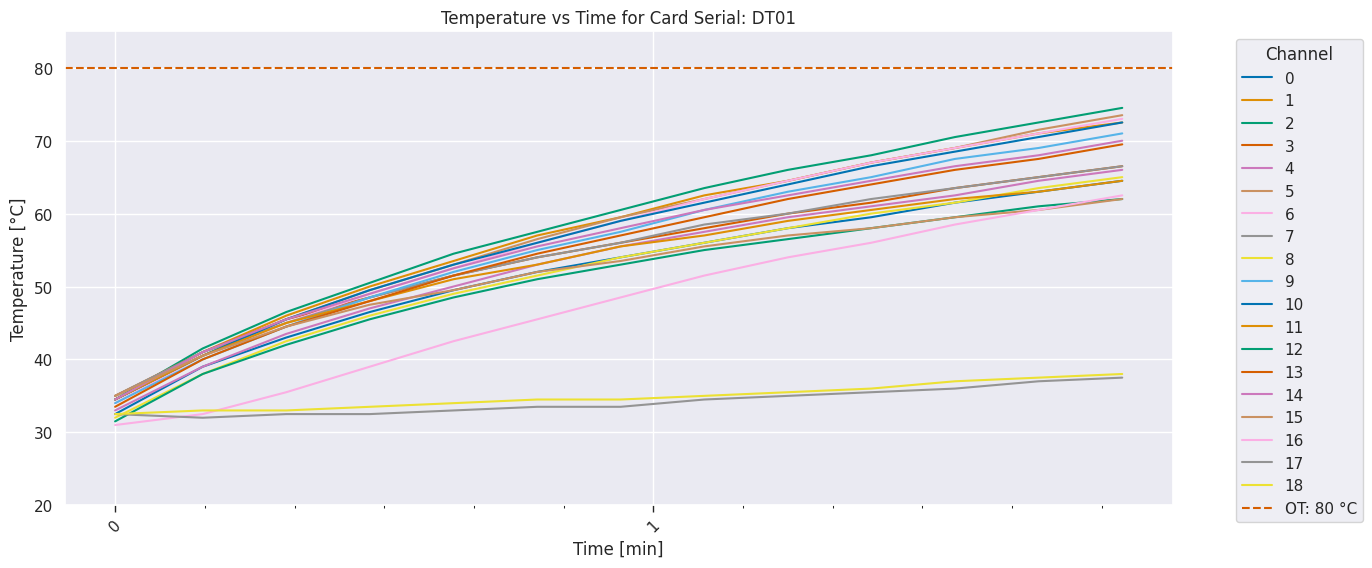

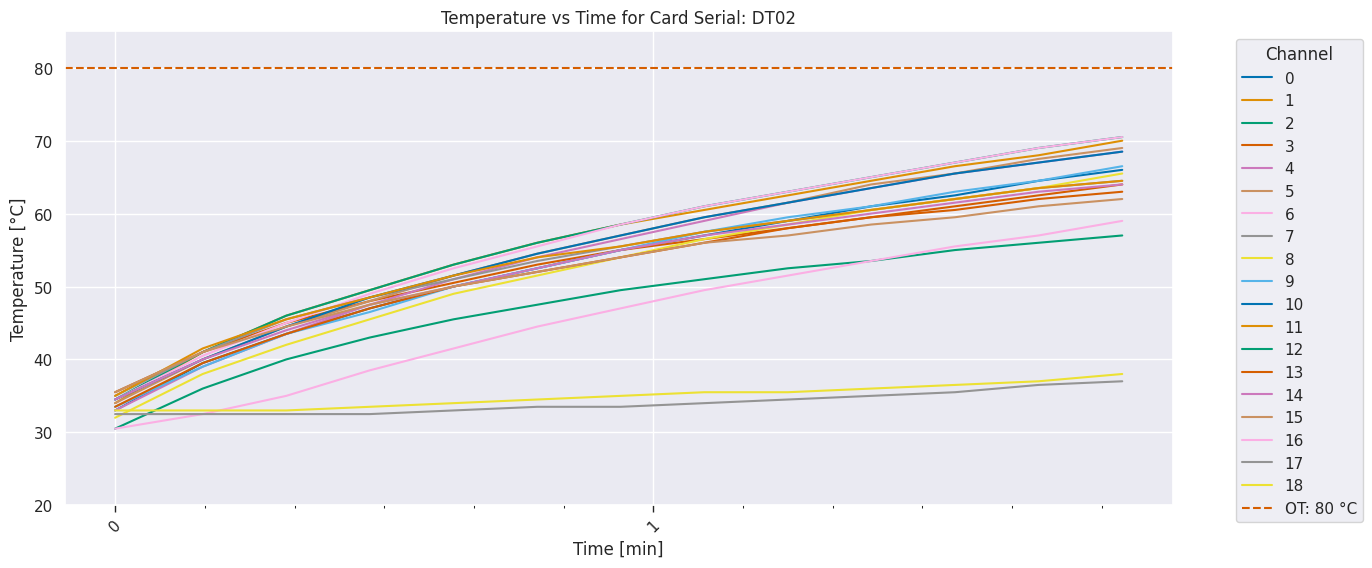

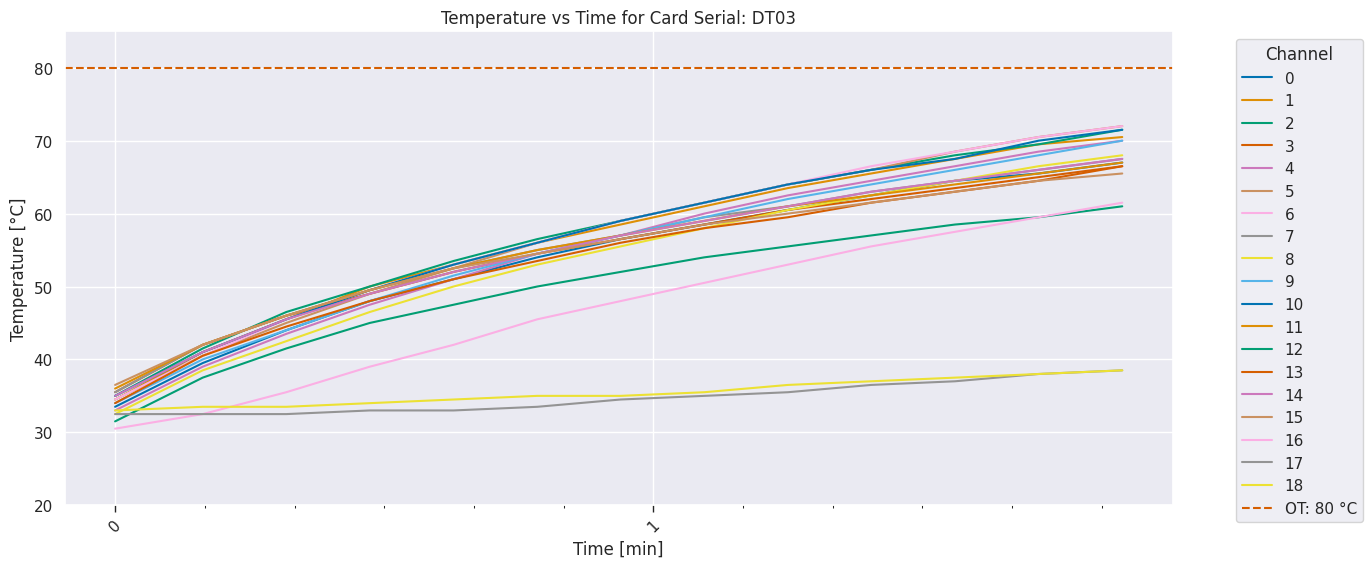

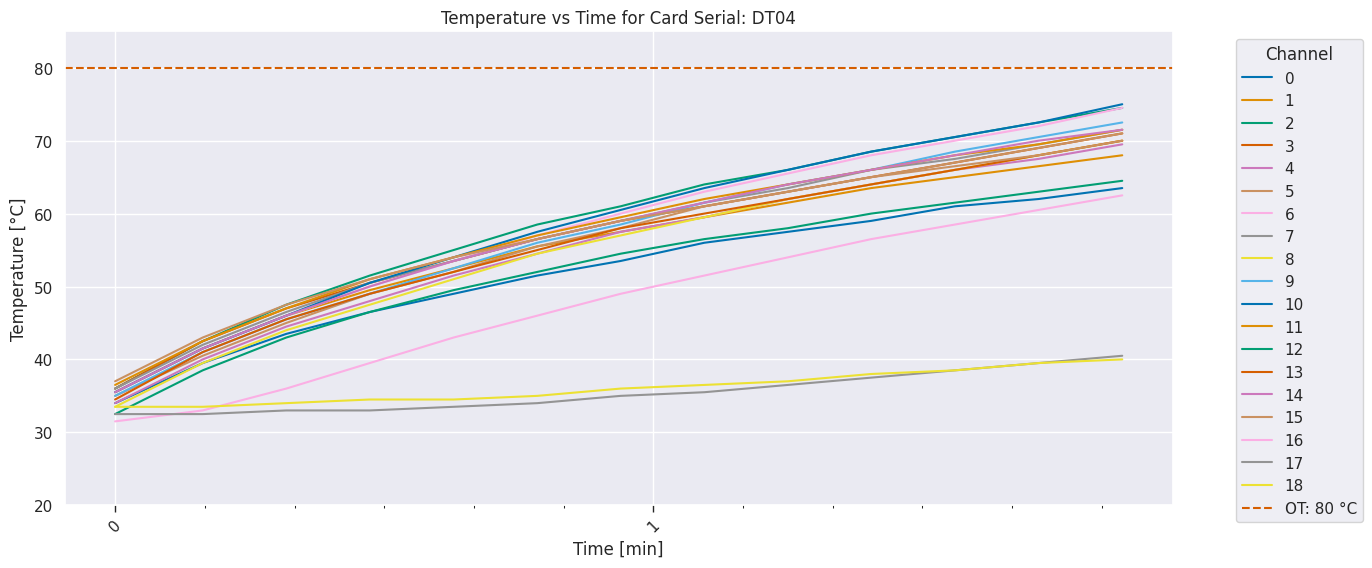

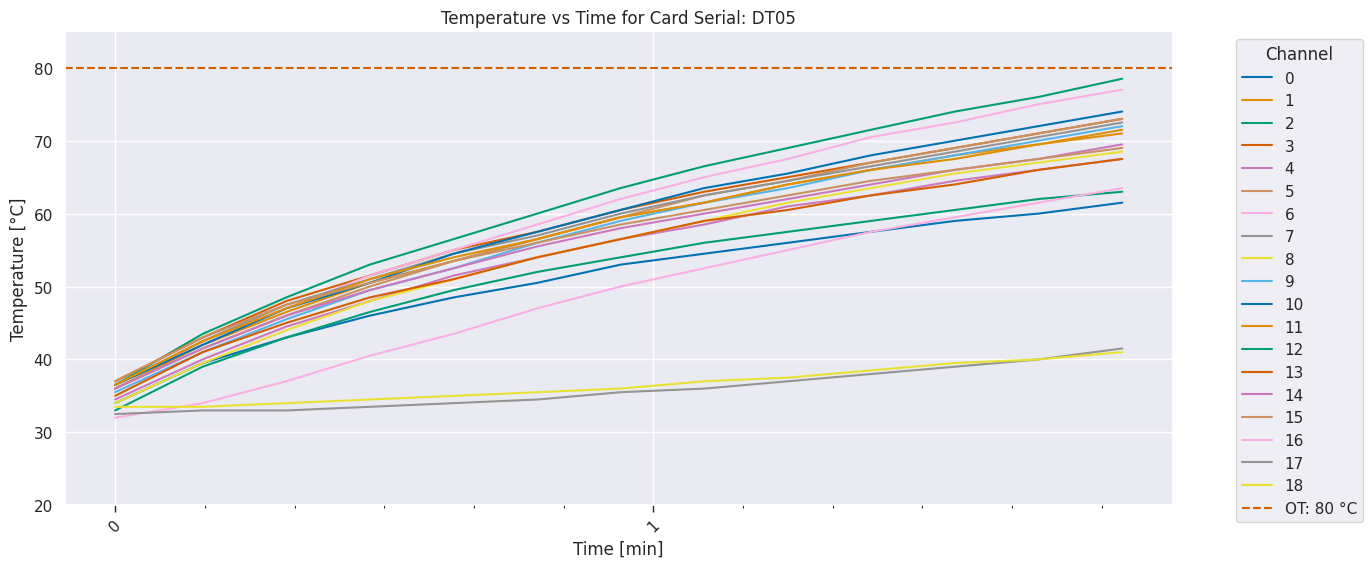

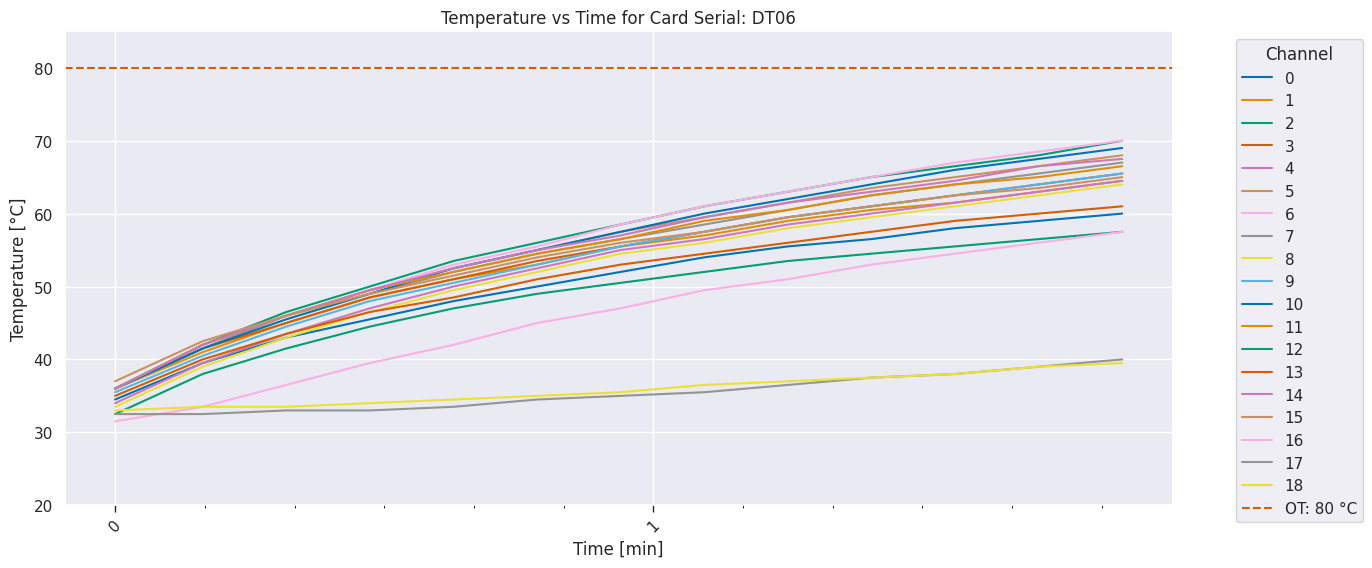

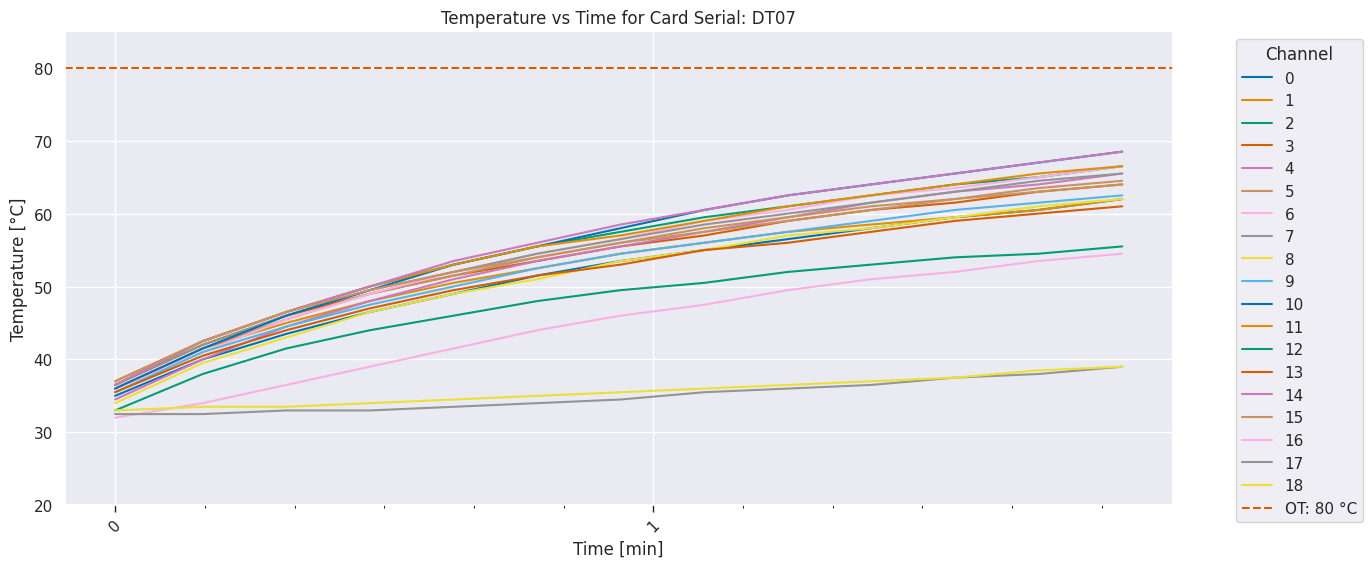

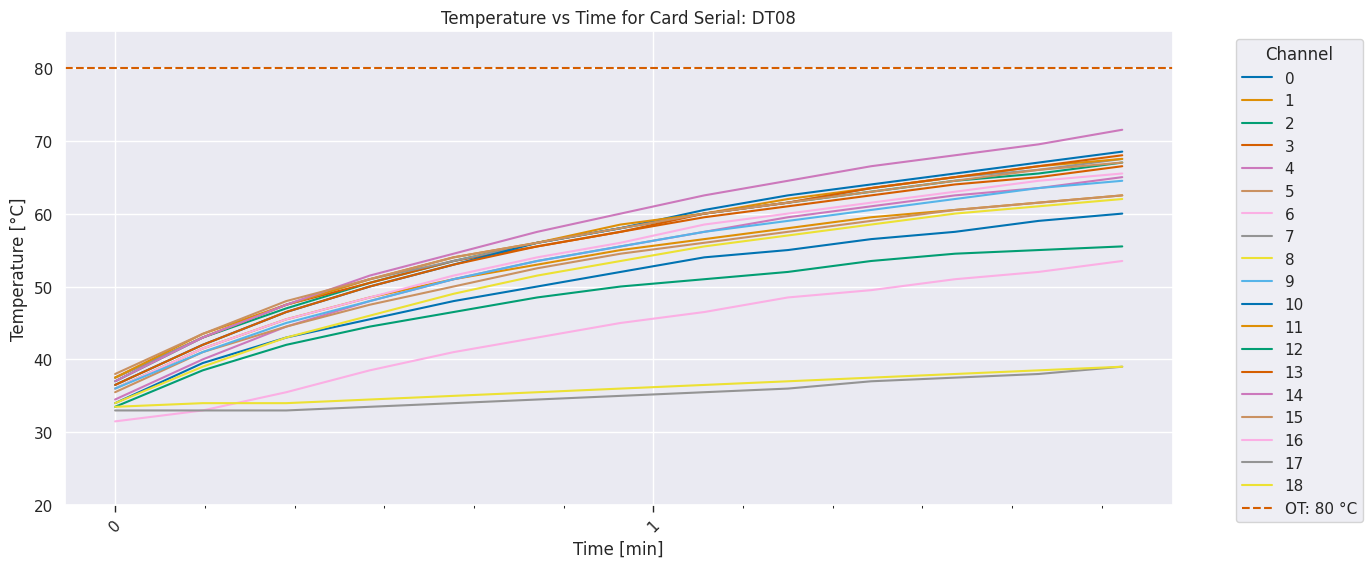

In [23]:
sns.set_theme(style="darkgrid", palette="colorblind")


card_serials = df["card_serial"].unique()
for card_serial in card_serials:
    card_df = df[df["card_serial"] == card_serial]
    ss_achieved = card_df[card_df["elapsed_time"] == card_df["elapsed_time"].max()]["steady_state"].all()
    if ss_achieved:
        print(f"Card serial {card_serial} has achieved steady-state...")

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        data=card_df,
        x="elapsed_time",
        y="temperature",
        hue="channel",
        palette="colorblind",
    )
    plt.title(f"Temperature vs Time for Card Serial: {card_serial}")
    plt.xlabel("Time [min]")
    plt.ylabel("Temperature [°C]")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.ylim(20, 85)

    plt.grid(True)
    setup_axis(ax)
    plt.axhline(y=80, color="r", linestyle="--", label="OT: 80 °C")
    plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")


    plt.show()

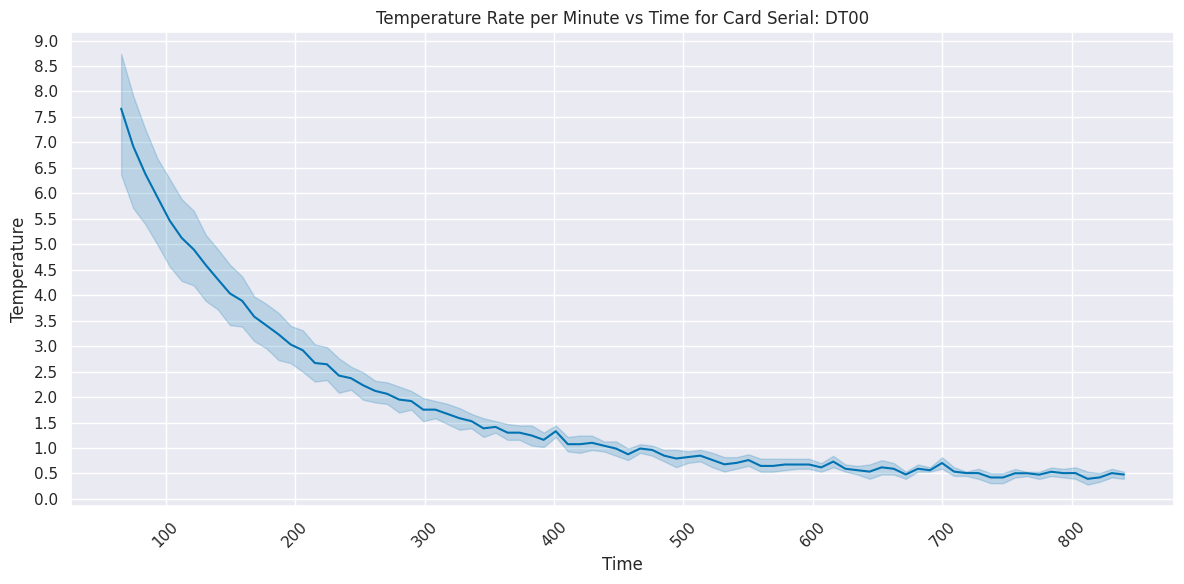

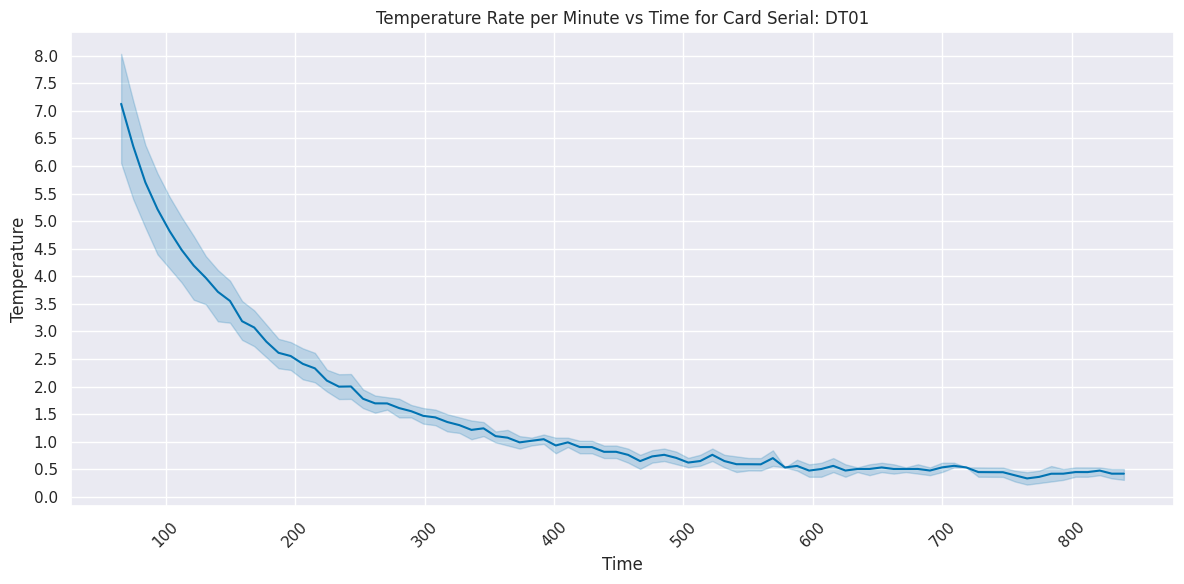

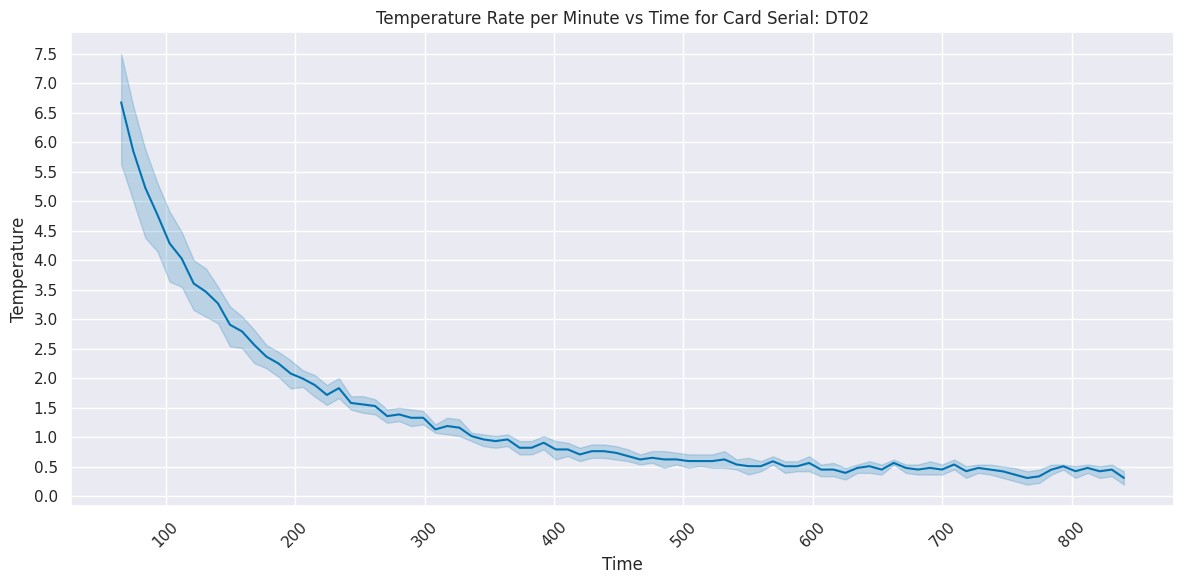

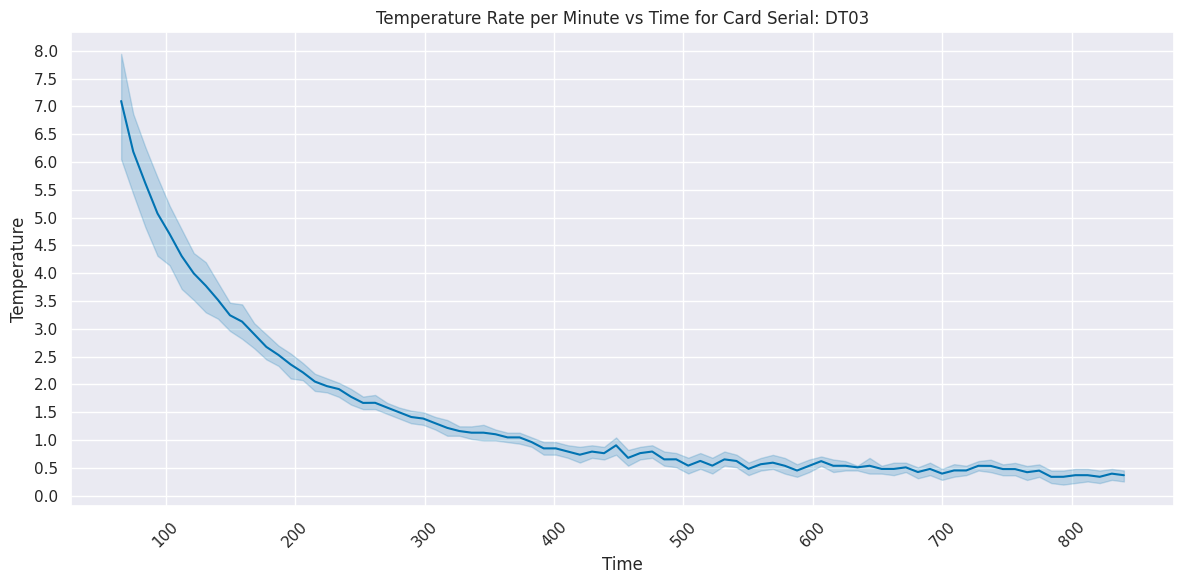

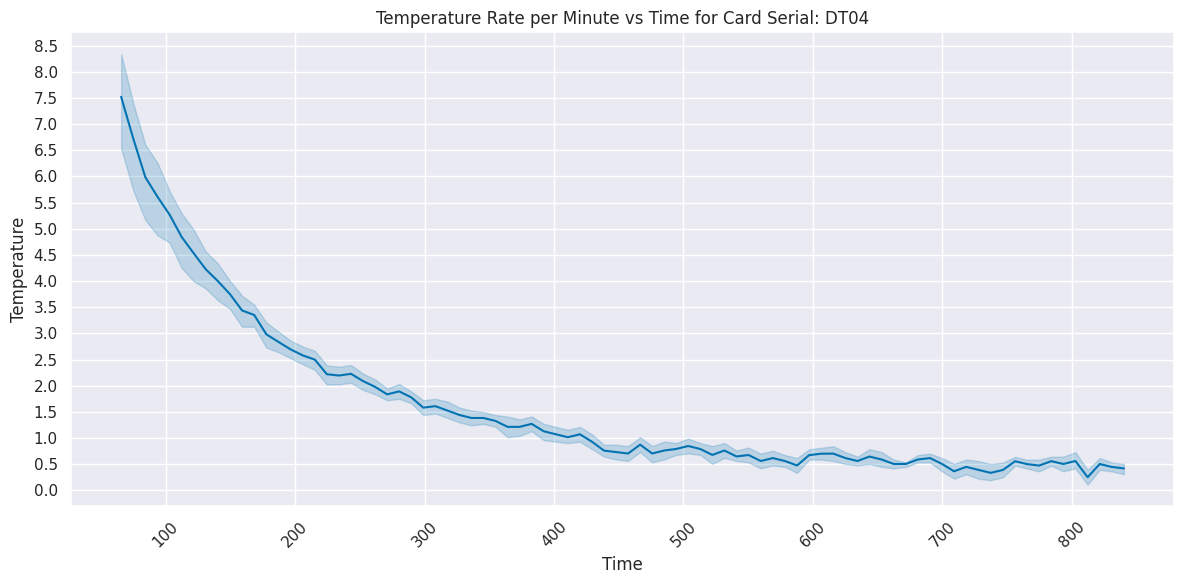

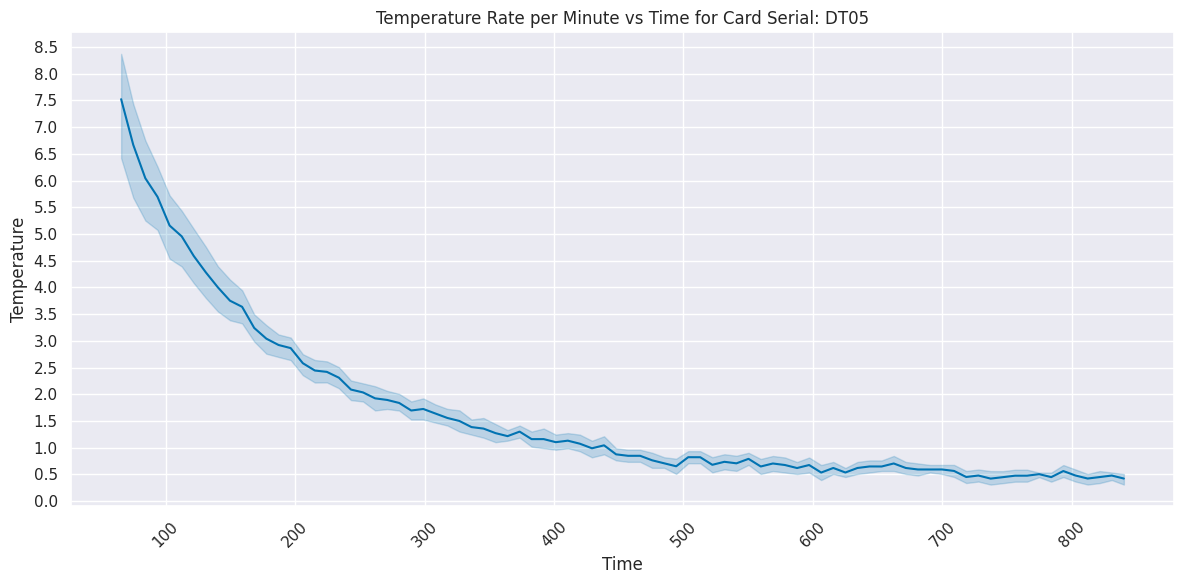

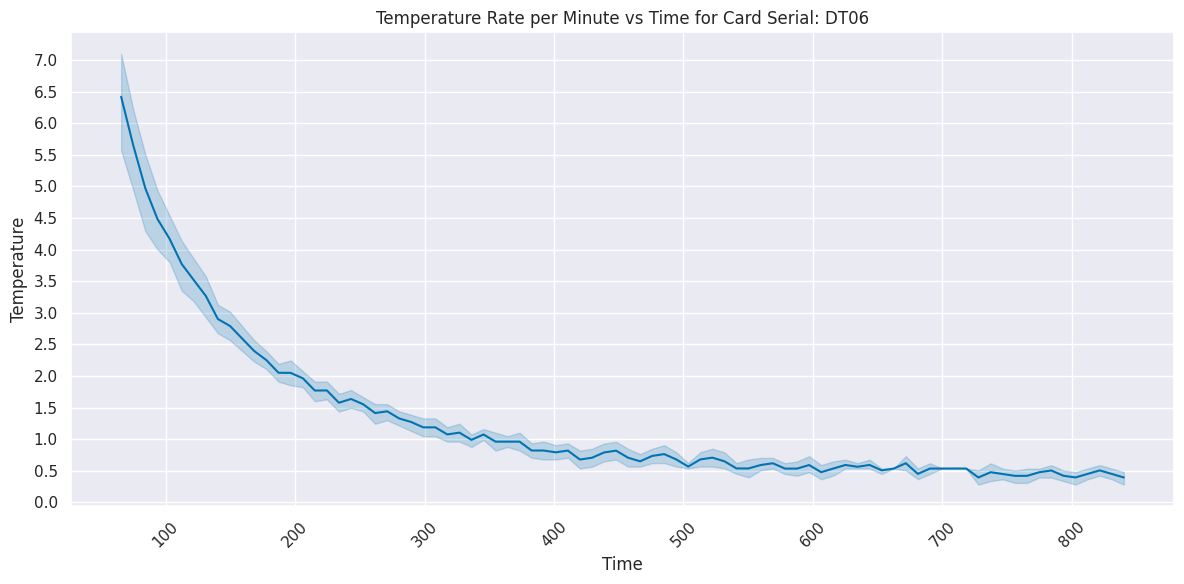

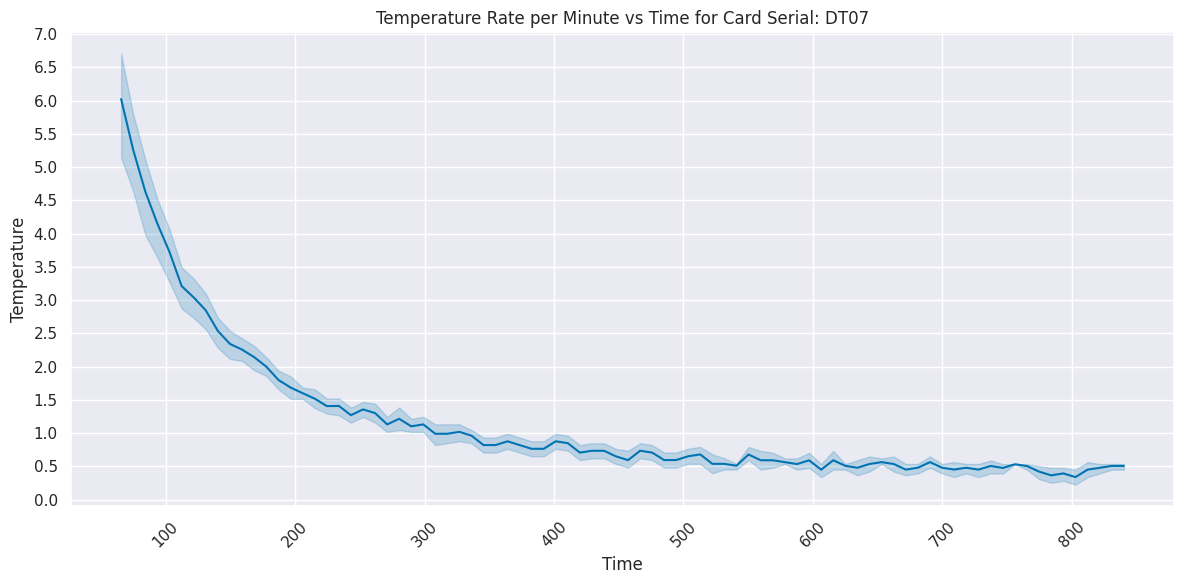

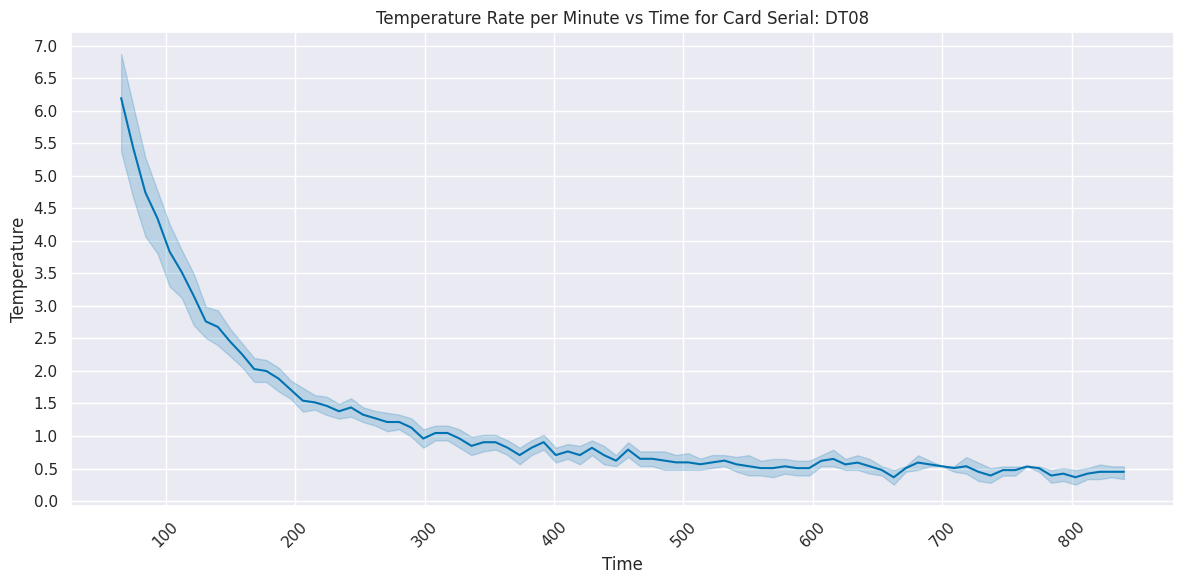

In [21]:
for card_serial in card_serials:
    card_df = df[df["card_serial"] == card_serial]
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        data=card_df,
        x="elapsed_time",
        y="temp_rate_per_min",
        # hue="channel",
        # palette="colorblind",
    )
    # sns.lineplot(data=card_df, x="elapsed_time", y="temp_rate_per_min")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
    plt.title(f"Temperature Rate per Minute vs Time for Card Serial: {card_serial}")
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.grid(True)
    
    plt.show()